[INFO] Found 12 Faces!
[INFO] Image Human2.jpg written to filesystem:  True


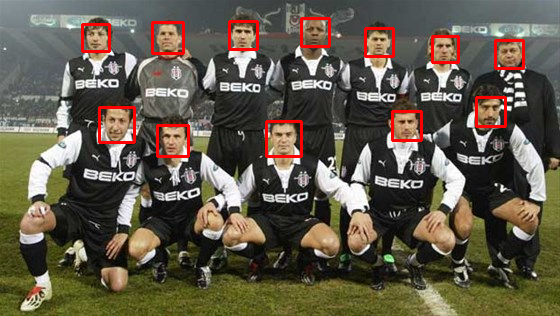

In [21]:
import cv2
import sys

# load the image
image = cv2.imread("Human.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# use cv2.data.haarcascades to ensure the correct path is used
face_cascade_path = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
# Changed to string path
eye_cascade_path = cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml"
# Changed to string path

# load the cascade classifiers
face_cascade = cv2.CascadeClassifier(face_cascade_path) # Now passing string path
eye_cascade = cv2.CascadeClassifier(eye_cascade_path) # Now passing string path

# check if the classifiers loaded successfully
if face_cascade.empty():
  print("Error loading face cascade classifier!")
  sys.exit()

if eye_cascade.empty(): # Removed extra indentation
    print("Error loading eye cascade classifier!")
    sys.exit()

# Detect faces
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.075,
    minNeighbors=5,
    minSize=(15, 15)
)

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

print("[INFO] Found {0} Faces!".format(len(faces)))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0,0,255), 2)

status = cv2.imwrite('Human2.jpg', image)
print("[INFO] Image Human2.jpg written to filesystem: ", status)

from google.colab.patches import cv2_imshow # Import the patch for cv2_imshow

cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()